In [13]:
import os
import cv2
import numpy as np
from glob import glob

# Define base asset path
base_path = "assets"

# Refined region covering full UI text (x, y, w, h)
INPAINT_REGION = (0, 0, 2000, 500)

# Define source -> target mapping
folders = {
    "knife": "knife_clean",
    "marine": "marine_clean"
}

def inpaint_ui_text(image_path, output_path, region):
    img = cv2.imread(image_path)
    if img is None:
        print(f"❌ Could not read {image_path}")
        return

    x, y, w, h = region

    # Create a mask where the region is white (1) and elsewhere is black (0)
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    mask[y:y+h, x:x+w] = 255

    # Inpaint using TELEA algorithm (fast and good for UI removal)
    inpainted = cv2.inpaint(img, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    cv2.imwrite(output_path, inpainted)

for src_name, tgt_name in folders.items():
    src_dir = os.path.join(base_path, src_name, "images_raw")
    tgt_dir = os.path.join(base_path, tgt_name, "images_raw")
    os.makedirs(tgt_dir, exist_ok=True)

    image_paths = sorted(glob(os.path.join(src_dir, "*.png")))
    for img_path in image_paths:
        filename = os.path.basename(img_path)
        out_path = os.path.join(tgt_dir, filename)
        inpaint_ui_text(img_path, out_path, INPAINT_REGION)
        print(f"🧽 Inpainted: {filename}")

print("\n✅ All images processed and saved in cleaned folders.")


🧽 Inpainted: Screenshot 2025-07-15 124237.png
🧽 Inpainted: Screenshot 2025-07-15 124253.png
🧽 Inpainted: Screenshot 2025-07-15 124308.png
🧽 Inpainted: Screenshot 2025-07-15 124323.png
🧽 Inpainted: Screenshot 2025-07-15 124340.png
🧽 Inpainted: Screenshot 2025-07-15 124357.png
🧽 Inpainted: Screenshot 2025-07-15 124426.png
🧽 Inpainted: Screenshot 2025-07-15 124441.png
🧽 Inpainted: Screenshot 2025-07-15 124458.png
🧽 Inpainted: Screenshot 2025-07-15 124648.png
🧽 Inpainted: Screenshot 2025-07-15 124703.png
🧽 Inpainted: Screenshot 2025-07-15 124719.png
🧽 Inpainted: Screenshot 2025-07-15 124733.png
🧽 Inpainted: Screenshot 2025-07-15 124750.png
🧽 Inpainted: Screenshot 2025-07-15 123438.png
🧽 Inpainted: Screenshot 2025-07-15 123455.png
🧽 Inpainted: Screenshot 2025-07-15 123512.png
🧽 Inpainted: Screenshot 2025-07-15 123535.png
🧽 Inpainted: Screenshot 2025-07-15 123552.png
🧽 Inpainted: Screenshot 2025-07-15 123609.png
🧽 Inpainted: Screenshot 2025-07-15 123626.png
🧽 Inpainted: Screenshot 2025-07-15

In [1]:
import cv2
import numpy as np

def degrade_image(image, blur_strength=3, noise_std=10, haze_strength=0.4, color_shift=True):
    """
    Simulate underwater-like degradation on an image.
    
    Parameters:
    - image: Input image as a NumPy array (BGR format).
    - blur_strength: Kernel size for Gaussian blur (must be odd).
    - noise_std: Standard deviation of Gaussian noise (0–50 typical).
    - haze_strength: Factor for contrast loss (0–1), higher = hazier.
    - color_shift: If True, add a blue/green underwater tint.

    Returns:
    - Degraded image.
    """

    # Apply Gaussian blur
    if blur_strength > 0:
        image = cv2.GaussianBlur(image, (blur_strength, blur_strength), 0)

    # Add Gaussian noise
    noise = np.random.normal(0, noise_std, image.shape).astype(np.float32)
    noisy_image = np.clip(image.astype(np.float32) + noise, 0, 255).astype(np.uint8)

    # Simulate haze (reduce contrast and increase brightness)
    hazy_image = cv2.addWeighted(noisy_image, 1 - haze_strength, np.full_like(noisy_image, 255), haze_strength, 0)

    # Simulate underwater color cast
    if color_shift:
        b, g, r = cv2.split(hazy_image)
        r = cv2.multiply(r, 0.6)  # Red gets absorbed quickly in water
        g = cv2.multiply(g, 0.9)
        degraded = cv2.merge((b, g, r))
    else:
        degraded = hazy_image

    return degraded


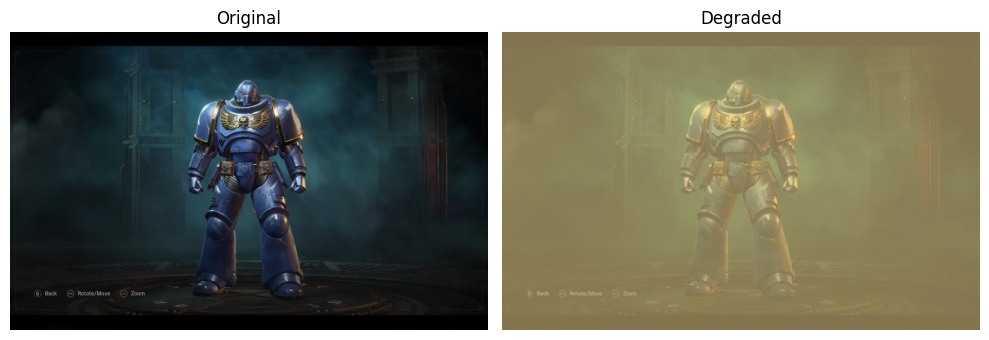

In [2]:
import os
from matplotlib import pyplot as plt

# Load an image from your marine dataset
img_path = "assets/marine/images_raw/Screenshot 2025-07-15 123438.png"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply degradation
degraded = degrade_image(image, blur_strength=5, noise_std=15, haze_strength=0.5)

# Show original vs degraded
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(image)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Degraded")
plt.imshow(degraded)
plt.axis("off")
plt.tight_layout()
plt.show()


In [3]:
import os

def batch_degrade_images(input_dir, output_dir, **kwargs):
    os.makedirs(output_dir, exist_ok=True)
    for fname in os.listdir(input_dir):
        if fname.lower().endswith((".png", ".jpg", ".jpeg")):
            img = cv2.imread(os.path.join(input_dir, fname))
            degraded = degrade_image(img, **kwargs)
            cv2.imwrite(os.path.join(output_dir, fname), degraded)


In [4]:
batch_degrade_images(
    input_dir="assets/knife/images_raw",
    output_dir="assets/knife_noisy/images_raw",
    blur_strength=5,
    noise_std=20,
    haze_strength=0.4
)

In [5]:
batch_degrade_images(
    input_dir="assets/marine/images_raw",
    output_dir="assets/marine_noisy/images_raw",
    blur_strength=5,
    noise_std=20,
    haze_strength=0.4
)